In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the train dataset
train_data = pd.read_csv('train.csv')

In [3]:
# Load the test dataset
test_data = pd.read_csv('test.csv')

In [4]:
# Separate features (X) and target variable (y) for training data
X_train = train_data.drop('Cover_Type', axis=1)
y_train = train_data['Cover_Type']

In [5]:
# Separate features (X) for test data
X_test = test_data

In [6]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [9]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [10]:
# Define the neural network model
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 7)  # Assuming 7 classes for the target variable
)

In [11]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

In [12]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Training loop
num_epochs = 100
batch_size = 32
num_batches = len(X_train_tensor) // batch_size
train_accuracy_list = []
val_accuracy_list = []

for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        
        # Forward pass
        outputs = model(X_train_tensor[start:end])
        loss = criterion(outputs, y_train_tensor[start:end])
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Validate the model
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = (val_outputs.argmax(dim=1) == y_val_tensor).float().mean()
        
    train_accuracy_list.append((outputs.argmax(dim=1) == y_train_tensor[start:end]).float().mean().item())
    val_accuracy_list.append(val_accuracy.item())
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy.item():.4f}")

Epoch 1/100, Loss: 0.6702, Val Loss: 0.7495, Val Accuracy: 0.6921
Epoch 2/100, Loss: 0.5453, Val Loss: 0.6621, Val Accuracy: 0.7348
Epoch 3/100, Loss: 0.4636, Val Loss: 0.6180, Val Accuracy: 0.7536
Epoch 4/100, Loss: 0.4128, Val Loss: 0.5924, Val Accuracy: 0.7632
Epoch 5/100, Loss: 0.3770, Val Loss: 0.5767, Val Accuracy: 0.7708
Epoch 6/100, Loss: 0.3578, Val Loss: 0.5666, Val Accuracy: 0.7738
Epoch 7/100, Loss: 0.3517, Val Loss: 0.5603, Val Accuracy: 0.7768
Epoch 8/100, Loss: 0.3431, Val Loss: 0.5540, Val Accuracy: 0.7765
Epoch 9/100, Loss: 0.3320, Val Loss: 0.5532, Val Accuracy: 0.7765
Epoch 10/100, Loss: 0.3341, Val Loss: 0.5487, Val Accuracy: 0.7821
Epoch 11/100, Loss: 0.3377, Val Loss: 0.5432, Val Accuracy: 0.7851
Epoch 12/100, Loss: 0.3314, Val Loss: 0.5356, Val Accuracy: 0.7864
Epoch 13/100, Loss: 0.3203, Val Loss: 0.5344, Val Accuracy: 0.7894
Epoch 14/100, Loss: 0.3198, Val Loss: 0.5312, Val Accuracy: 0.7900
Epoch 15/100, Loss: 0.3170, Val Loss: 0.5292, Val Accuracy: 0.7894
Epoc

In [18]:
# Evaluate the model on the test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = label_encoder.inverse_transform(test_outputs.argmax(dim=1).numpy())

In [19]:
# Save the test predictions to a CSV file
test_data['Cover_Type'] = test_predictions
test_data.to_csv('test_predictions2.csv', index=False)

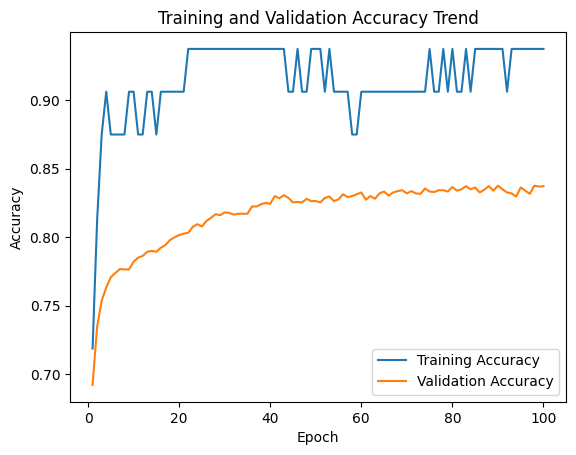

In [16]:
# Plot the accuracy trend
epochs = list(range(1, num_epochs + 1))
plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Trend')
plt.legend()
plt.show()

Epoch 1/100, Loss: 0.1748, Val Loss: 0.6498, Val Accuracy: 0.8327
Epoch 2/100, Loss: 0.1741, Val Loss: 0.6577, Val Accuracy: 0.8347
Epoch 3/100, Loss: 0.1855, Val Loss: 0.6610, Val Accuracy: 0.8347
Epoch 4/100, Loss: 0.2105, Val Loss: 0.6659, Val Accuracy: 0.8343
Epoch 5/100, Loss: 0.1745, Val Loss: 0.6715, Val Accuracy: 0.8340
Epoch 6/100, Loss: 0.1654, Val Loss: 0.6740, Val Accuracy: 0.8337
Epoch 7/100, Loss: 0.1793, Val Loss: 0.6814, Val Accuracy: 0.8327
Epoch 8/100, Loss: 0.1392, Val Loss: 0.6802, Val Accuracy: 0.8340
Epoch 9/100, Loss: 0.2191, Val Loss: 0.6952, Val Accuracy: 0.8297
Epoch 10/100, Loss: 0.1648, Val Loss: 0.6858, Val Accuracy: 0.8356
Epoch 11/100, Loss: 0.1894, Val Loss: 0.6991, Val Accuracy: 0.8353
Epoch 12/100, Loss: 0.1527, Val Loss: 0.7373, Val Accuracy: 0.8294
Epoch 13/100, Loss: 0.1749, Val Loss: 0.6927, Val Accuracy: 0.8340
Epoch 14/100, Loss: 0.2011, Val Loss: 0.7050, Val Accuracy: 0.8363
Epoch 15/100, Loss: 0.1653, Val Loss: 0.7096, Val Accuracy: 0.8350
Epoc

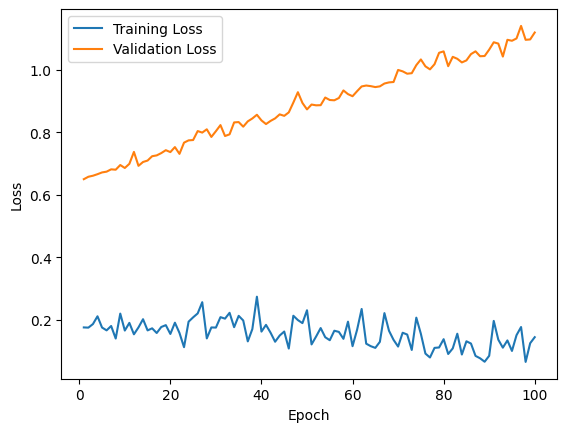

In [17]:
# Lists to store the loss values
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        
        # Forward pass
        outputs = model(X_train_tensor[start:end])
        loss = criterion(outputs, y_train_tensor[start:end])
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Validate the model
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = (val_outputs.argmax(dim=1) == y_val_tensor).float().mean()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy.item():.4f}")
    
    # Append the loss values to the lists
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

# Plot the training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

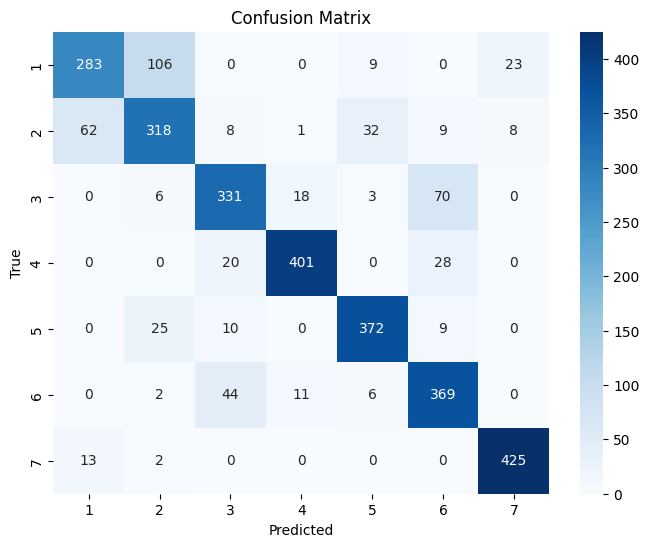

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on validation data
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_predictions = val_outputs.argmax(dim=1).numpy()

# Create confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, val_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

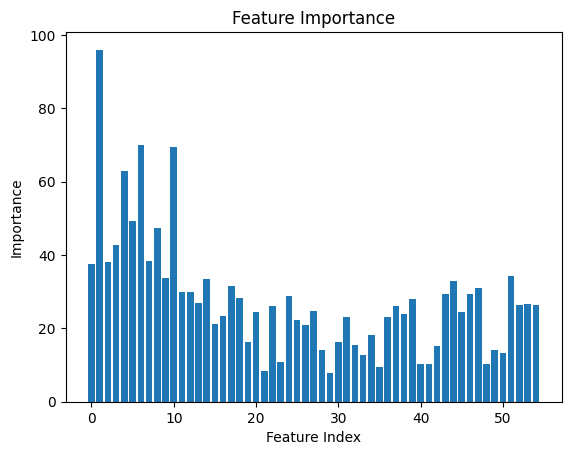

In [21]:
# Get the weights of the linear layers
linear_layer_weights = model[0].weight.data

# Compute feature importance by summing weights along each feature dimension
feature_importance = linear_layer_weights.abs().sum(dim=0)

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

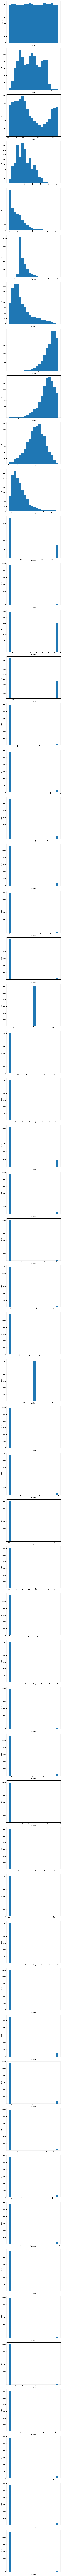

In [22]:
# Plot histograms for each feature in X_train_scaled
fig, axs = plt.subplots(nrows=X_train_scaled.shape[1], figsize=(8, 6 * X_train_scaled.shape[1]))

for i in range(X_train_scaled.shape[1]):
    axs[i].hist(X_train_scaled[:, i], bins=20)
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

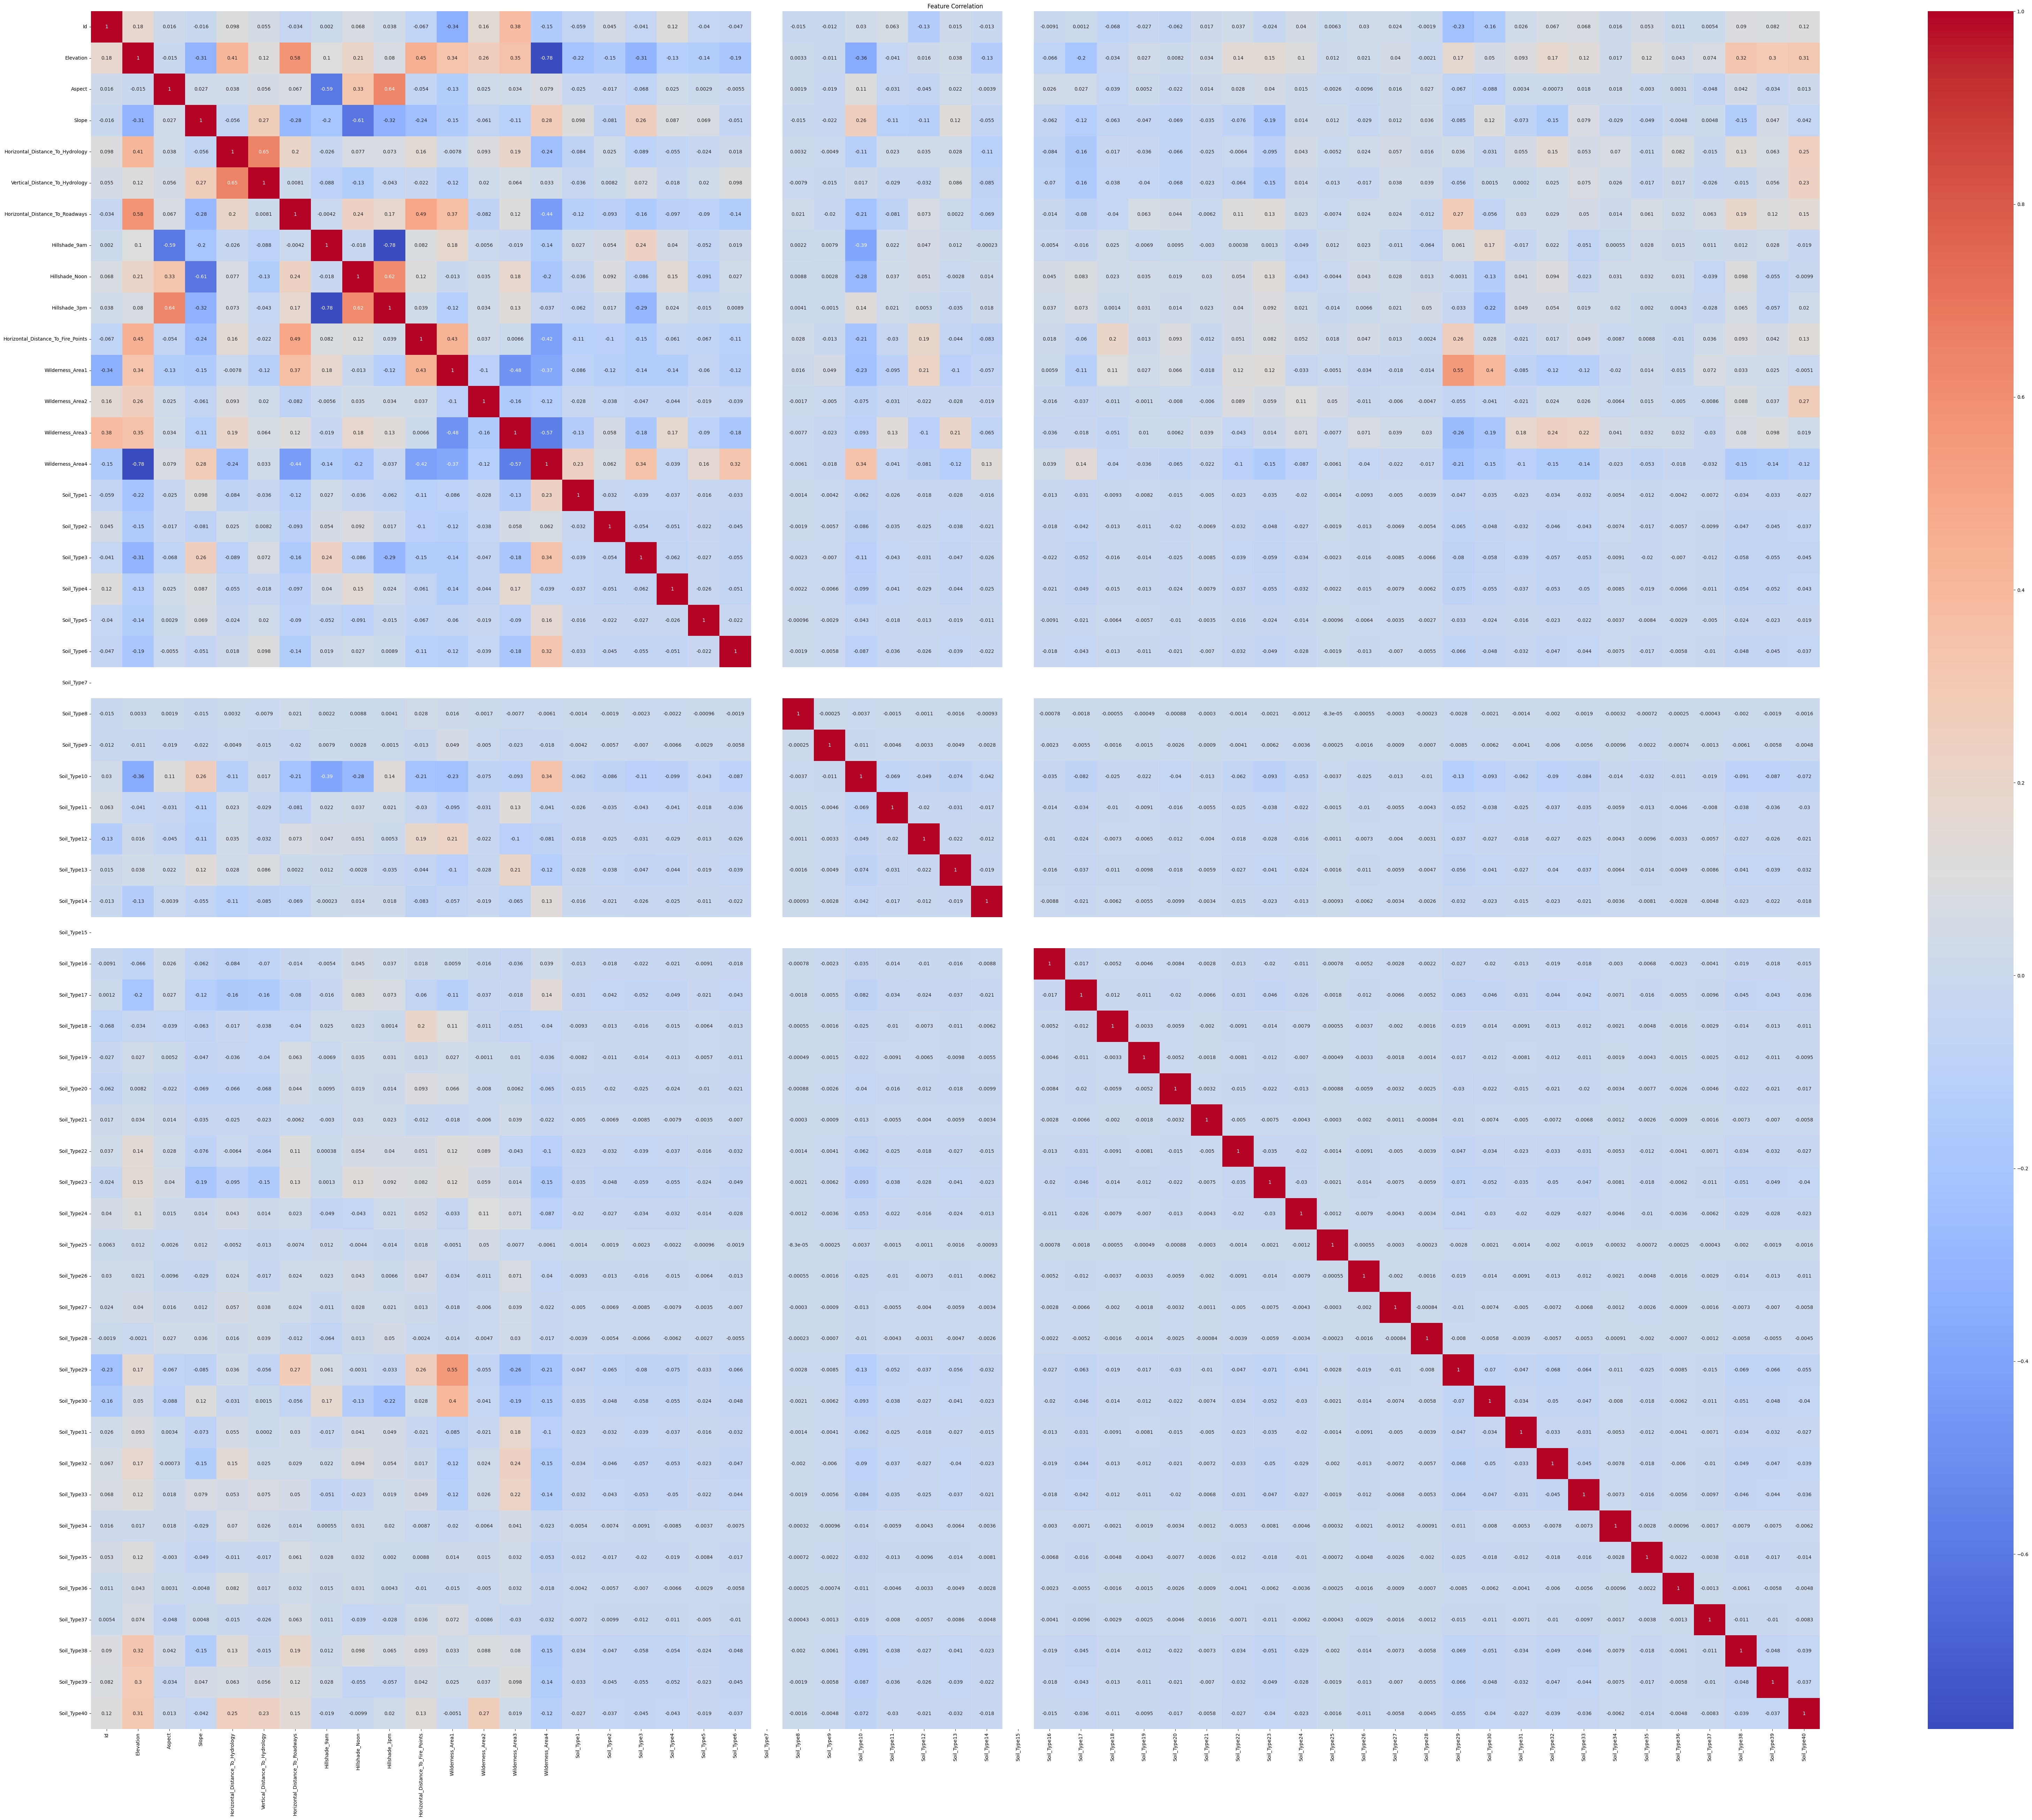

In [26]:
# Compute correlation matrix
correlation_matrix = np.corrcoef(X_train_scaled, rowvar=False)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(80, 64))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.title('Feature Correlation')
plt.show()